In [ ]:
"""
This code was adapted from Brouwer (2020) [github.com/hbrouwer/rerps].
"""

In [3]:
import sys
import pandas as pd
import rerps.models
import rerps.plots
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sps

In [3]:
def time_window_averages(ds, start, end):
    ts_idx = ds.descriptors["Time"]
    sds = ds.copy()
    sds.array = sds.array[(sds.array[:,ts_idx] >= start) & (sds.array[:,ts_idx] < end),:] # end-exclusive
    # sds.array = sds.array[(sds.array[:,ts_idx] >= start) & (sds.array[:,ts_idx] <= end),:] # end-inclusive
    sds_summary = rerps.models.DataSummary(sds, ["Condition", "Subject"])

    nrows = sds_summary.means.shape[0] * len(sds_summary.electrodes)
    sds_lf = np.empty((nrows, 4), dtype=object)

    sds_idx = 0
    for idx in range(0, sds_summary.means.shape[0]):
        c = sds_summary.means[idx, sds_summary.descriptors["Condition"]]
        s = sds_summary.means[idx, sds_summary.descriptors["Subject"]]
        for e, i in sds_summary.electrodes.items():
            sds_lf[sds_idx,:] = [c, s, e, sds_summary.means[idx,i]]
            sds_idx = sds_idx + 1

    return pd.DataFrame(sds_lf, columns=["cond", "subject", "ch", "eeg"])

# Create DataSet-s

## Local dependencies

In [3]:
# read the .csv and assign it to df variable
os.chdir( '/home/bkapusi' )

# read .csv
df=pd.read_csv( 'data/storage_barni/mt_sd_og.csv', index_col=False )
os.chdir( 'SYMUL' )

# Compare correct with only language incorrect
df_sd_lan=df[(df['Condition']=='FCC')|(df['Condition']=='FIC')]

# Compare correct with only music incorrect
df_sd_mus=df[(df['Condition']=='FCC')|(df['Condition']=='FCI')]

# Compare correct with both language and music incorrect
df_sd_dub = df[(df['Condition']=='FCC')|(df['Condition']=='FII')]

In [4]:
# Create DataSet object for language violation
obs_data_sd_lan = rerps.models.DataSet(
    data    = df_sd_lan,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating', 'LanguageViolation','MusicViolation'])

obs_data_sd_lan.array[:,obs_data_sd_lan.descriptors["Time"]] = obs_data_sd_lan.array[:,obs_data_sd_lan.descriptors["Time"]] * 1000
# obs_data.array = obs_data.array[(obs_data.array[:,obs_data.descriptors["cond"]] >= 125) & (obs_data.array[:,obs_data.descriptors["cond"]] <= 128) ,:]

# z-standardization
obs_data_sd_lan.zscore_predictor("MelodyRating")
# obs_data_sd_lan.zscore_predictor("meanSentRating")

# inversion (more means better 'sounding')
obs_data_sd_lan.array[:,obs_data_sd_lan.predictors["MelodyRating"]] *= -1
# obs_data_sd_lan.array[:,obs_data_sd_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.5 seconds.


In [5]:
# Create DataSet object for music violation
obs_data_sd_mus = rerps.models.DataSet(
    data    = df_sd_mus,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating', 'LanguageViolation','MusicViolation'])

obs_data_sd_mus.array[:,obs_data_sd_mus.descriptors["Time"]] = obs_data_sd_mus.array[:,obs_data_sd_mus.descriptors["Time"]] * 1000
# obs_data.array = obs_data.array[(obs_data.array[:,obs_data.descriptors["cond"]] >= 125) & (obs_data.array[:,obs_data.descriptors["cond"]] <= 128) ,:]

# z-standardization
# obs_data_mus.zscore_predictor("MelodyRating")
# obs_data_mus.zscore_predictor("meanSentRating")

# inversion (more means better 'sounding')
obs_data_sd_mus.array[:,obs_data_sd_mus.predictors["MelodyRating"]] *= -1
# obs_data_mus.array[:,obs_data_mus.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.49 seconds.


In [6]:
# do the z-score transformation for the melody rating separately
data = obs_data_sd_mus.array[:,9].astype( float )
meanVal = np.nanmean( data )
replaceNan = np.where( np.isnan( data ), meanVal, data )
zScore = sps.zscore( replaceNan )

obs_data_sd_mus.array[:,9] = zScore

In [7]:
# Create DataSet object for double violation
obs_data_sd_dub = rerps.models.DataSet(
    data    = df_sd_dub,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating', 'LanguageViolation','MusicViolation'])

obs_data_sd_dub.array[:,obs_data_sd_dub.descriptors["Time"]] = obs_data_sd_dub.array[:,obs_data_sd_dub.descriptors["Time"]] * 1000
# obs_data.array = obs_data.array[(obs_data.array[:,obs_data.descriptors["cond"]] >= 125) & (obs_data.array[:,obs_data.descriptors["cond"]] <= 128) ,:]

# z-standardization
obs_data_sd_dub.zscore_predictor("MelodyRating")
# obs_data_sd_dub.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_sd_dub.array[:,obs_data_sd_dub.predictors["MelodyRating"]] *= -1
# obs_data_sd_dub.array[:,obs_data_sd_dub.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.48 seconds.


## Long-distance dependencies

In [4]:
# read the .csv and assign it to df variable
os.chdir( '/home/bkapusi' )

# read the .csv
df = pd.read_csv( 'data/storage_barni/finalData/mt_ld_shift.csv', index_col=False )
os.chdir( 'SYMUL' )

# Compare correct with only language incorrect
df_ld_lan = df[(df['Condition']=='ECC')|(df['Condition']=='EIC')]

# Compare correct with only music incorrect
df_ld_mus = df[(df['Condition']=='ECC')|(df['Condition']=='ECI')]

# Compare correct with both language and music incorrect
df_ld_dub = df[(df['Condition']=='ECC')|(df['Condition']=='EII')]

In [5]:
# Create DataSet object language violation
obs_data_ld_lan = rerps.models.DataSet(
    data    = df_ld_lan,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_lan.array[:,obs_data_ld_lan.descriptors["Time"]] = obs_data_ld_lan.array[:,obs_data_ld_lan.descriptors["Time"]] * 1000

# z-standardization
obs_data_ld_lan.zscore_predictor("MelodyRating")
# obs_data_ld_lan.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_ld_lan.array[:,obs_data_ld_lan.predictors["MelodyRating"]] *= -1
# obs_data_ld_lan.array[:,obs_data_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.48 seconds.


In [6]:
# Create DataSet object music violation
obs_data_ld_mus = rerps.models.DataSet(
    data    = df_ld_mus,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_mus.array[:,obs_data_ld_mus.descriptors["Time"]] = obs_data_ld_mus.array[:,obs_data_ld_mus.descriptors["Time"]] * 1000

# z-standardization
# obs_data_ld_mus.zscore_predictor("MelodyRating")
# obs_data_lan.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data_ld_mus.array[:,obs_data_ld_mus.predictors["MelodyRating"]] *= -1
# obs_data_ld_lan.array[:,obs_data_ld_lan.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.47 seconds.


In [7]:
# do the z-score transformation for the melody rating separately
data = obs_data_ld_mus.array[:,9].astype( float )
meanVal = np.nanmean( data )
replaceNan = np.where( np.isnan( data ), meanVal, data )
zScore = sps.zscore( replaceNan )

obs_data_ld_mus.array[:,9] = zScore

In [8]:
# Create DataSet object for double violation
obs_data_ld_dub = rerps.models.DataSet(
    data    = df_ld_dub,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating','LanguageViolation','MusicViolation'])

obs_data_ld_dub.array[:,obs_data_ld_dub.descriptors["Time"]] = obs_data_ld_dub.array[:,obs_data_ld_dub.descriptors["Time"]] * 1000

# z-standardization
obs_data_ld_dub.zscore_predictor("MelodyRating")
# obs_data_ld_dub.zscore_predictor("meanSentRating")

# inversion (more means better 'sounding')
obs_data_ld_dub.array[:,obs_data_ld_dub.predictors["MelodyRating"]] *= -1
# obs_data_ld_dub.array[:,obs_data_ld_dub.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.47 seconds.


# ERPs

## Local dependencies

[dv_splits()]: Sorting set ... ( 0x7feb5972cf70 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.54 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7feb4087fdf0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


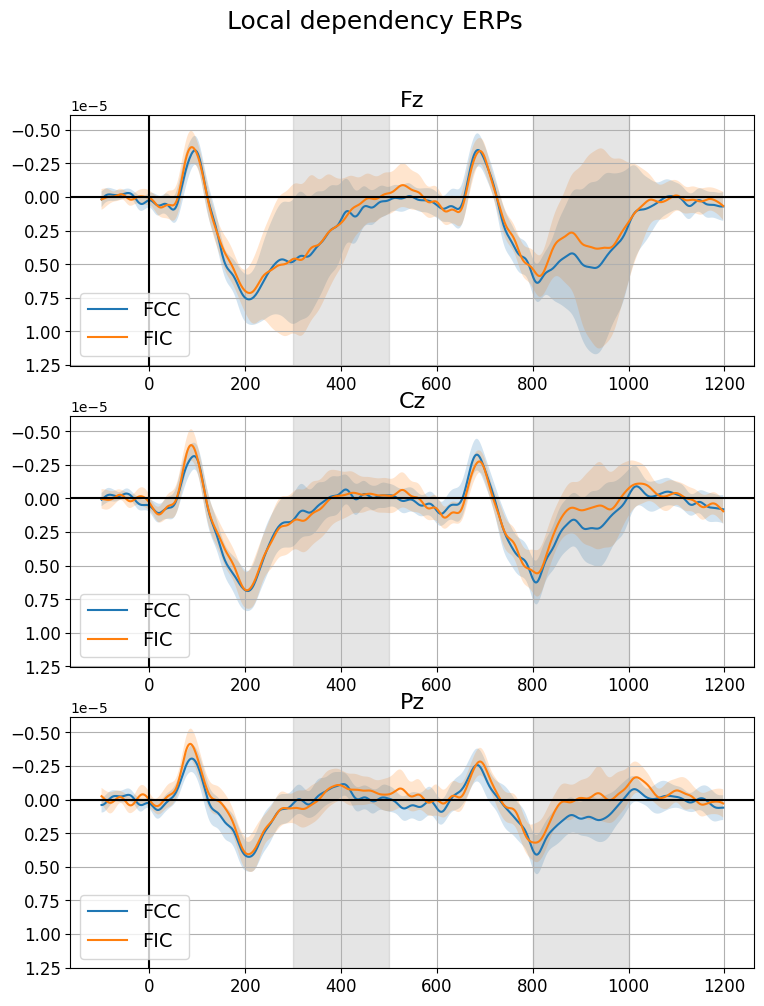

In [27]:
# Calculate ERPs for language violation
obs_data_summary = rerps.models.DataSummary(obs_data_sd_lan, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="Local dependency ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_langViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7febbc4ff640 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.11 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.8 seconds.
[dv_splits()]: Sorting set ... ( 0x7feb40769a00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


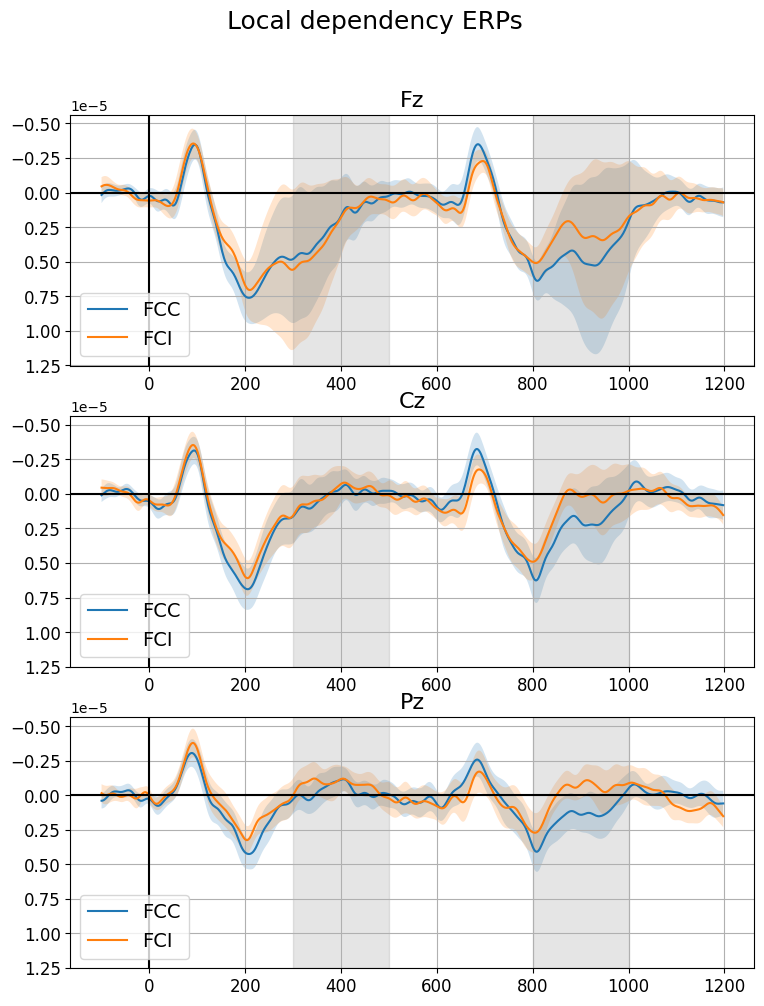

In [22]:
# Calculate ERPs for language violation
obs_data_summary = rerps.models.DataSummary(obs_data_sd_mus, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="Local dependency ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_musicViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7febb80d87c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.1 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.79 seconds.
[dv_splits()]: Sorting set ... ( 0x7feb44c18910 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


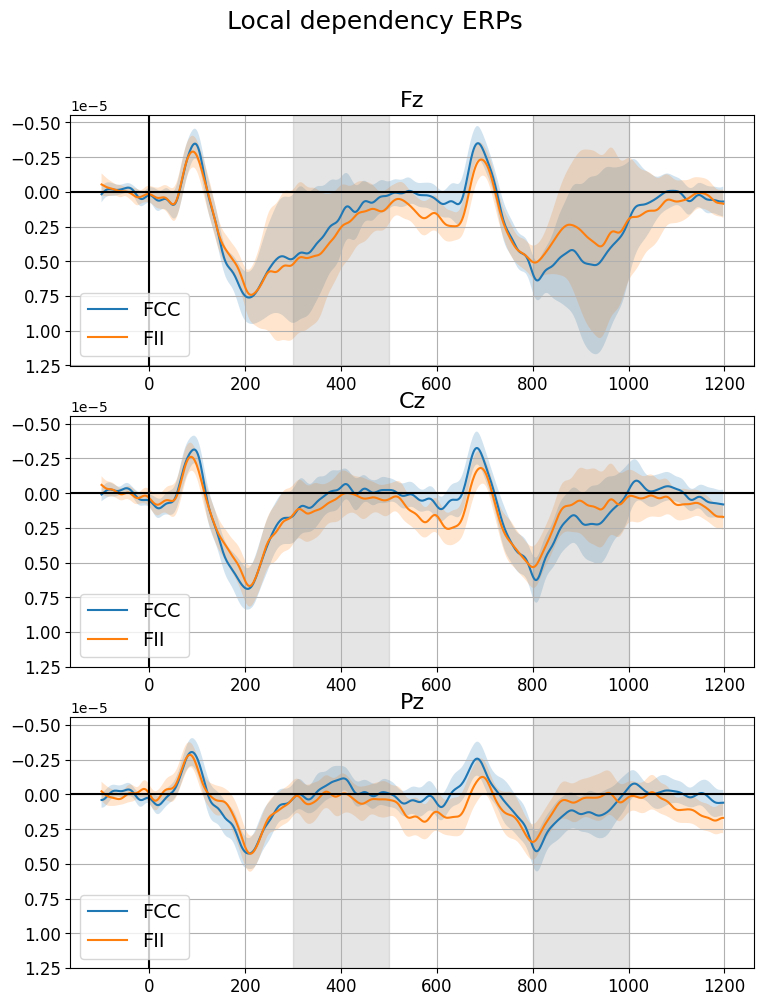

In [23]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_sd_dub, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="Local dependency ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_dubViol_new.pdf", bbox_inches='tight')

## Long-distance dependencies

[dv_splits()]: Sorting set ... ( 0x7f9fbc1104f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.17 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.74 seconds.
[dv_splits()]: Sorting set ... ( 0x7fa01c6f7460 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


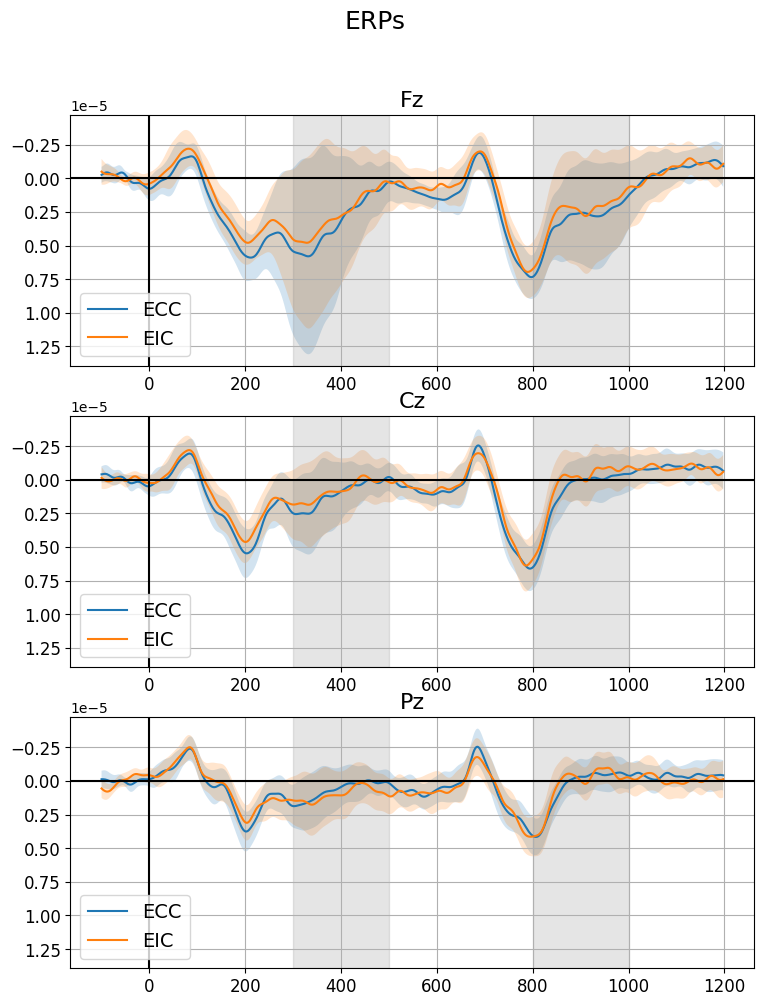

In [9]:
# Calculate ERPs for language violation
obs_data_summary = rerps.models.DataSummary(obs_data_ld_lan, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_langViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f9fbc0cb3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.11 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.65 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc1012e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


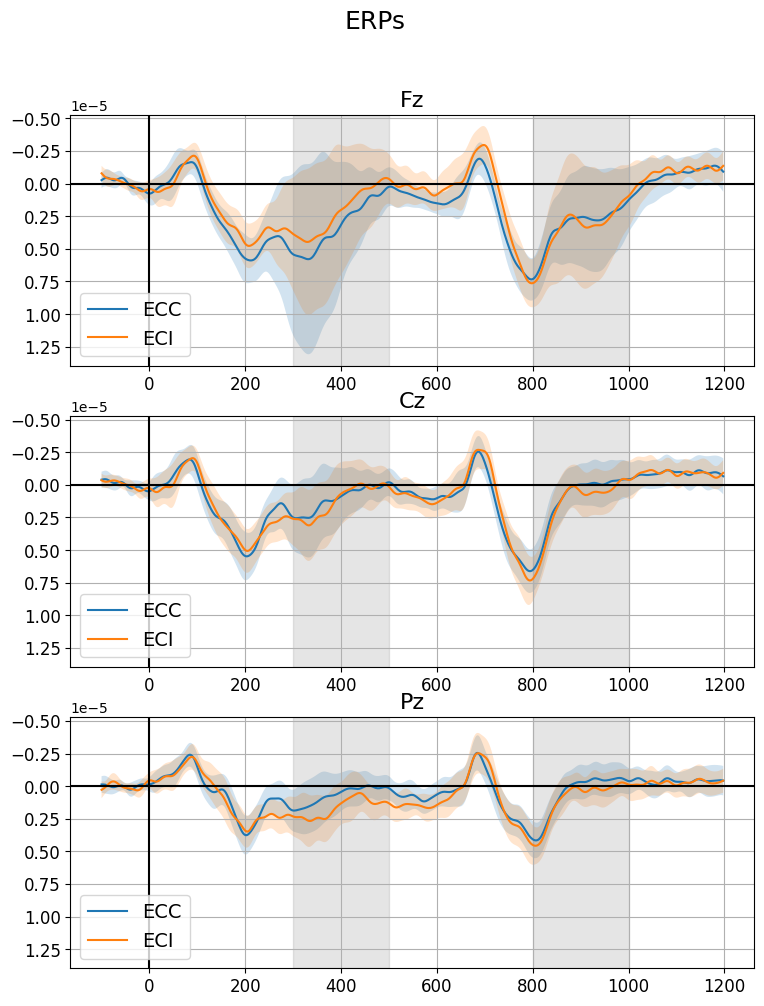

In [10]:
# Calculate ERPs for music violation
obs_data_summary = rerps.models.DataSummary(obs_data_ld_mus, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_musicViol_new.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.21 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.92 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa33fc9d0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


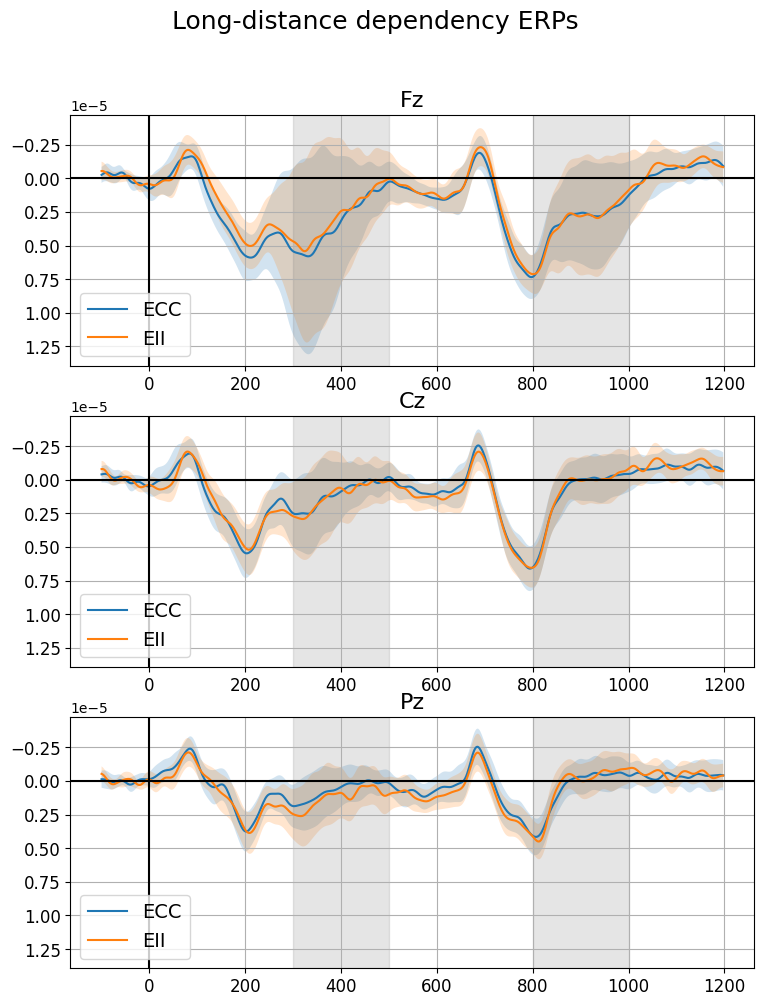

In [11]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data_ld_dub, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="Long-distance dependency ERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])

legend_fontsize = 10
fig.set_size_inches(30,15)

# Save figure
# fig.savefig("figures/erps_mt_long_dubViol_new.pdf", bbox_inches='tight')

# Intercept-only

[dv_splits()]: Sorting set ... ( 0x7f0b186e4a00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 47.64 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 4.68 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0b186e4a00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 17.03 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0b787a0220 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.98 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0a36f31040 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 25.33 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.03 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0a36f3aaf0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 sec

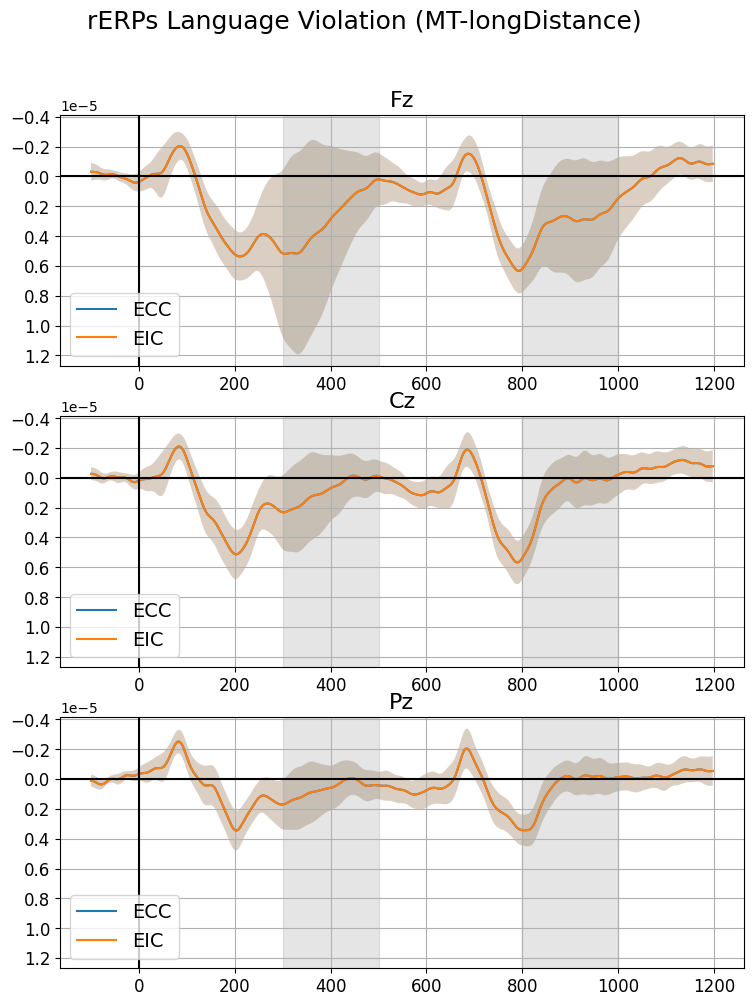

In [4]:
models = rerps.models.regress(obs_data_lan, ["Subject", "Time"], [])
est_data_lan = rerps.models.estimate(obs_data_lan, models)

est_data_summary = rerps.models.DataSummary(est_data_lan, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Language Violation (MT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30,15)
fig.savefig("figures/rerp_mt_long_langViol_interc.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f620aeee970 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 49.97 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.12 seconds.
[dv_splits()]: Sorting set ... ( 0x7f620aeee970 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 16.31 seconds.
[dv_splits()]: Sorting set ... ( 0x7f620b331be0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.01 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.76 seconds.
[dv_splits()]: Sorting set ... ( 0x7f620b331fa0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 22.73 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.03 seconds.
[dv_splits()]: Sorting set ... ( 0x7f613570caf0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.12 sec

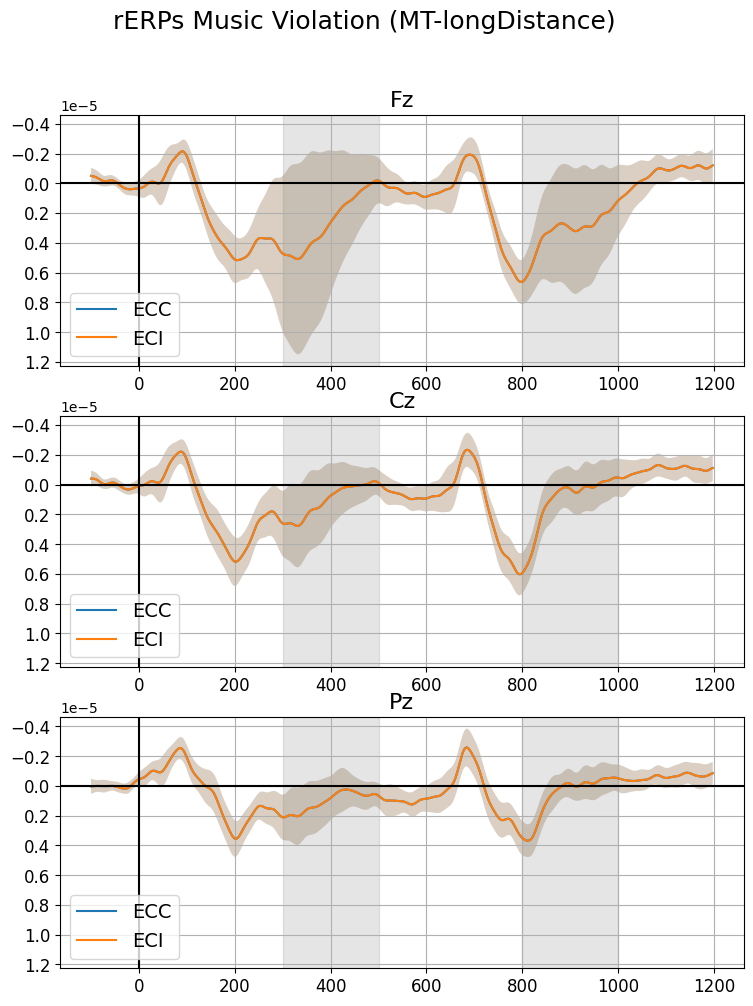

In [4]:
models = rerps.models.regress(obs_data_mus, ["Subject", "Time"], [])
est_data_mus = rerps.models.estimate(obs_data_mus, models)

est_data_summary = rerps.models.DataSummary(est_data_mus, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Music Violation (MT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30,15)
fig.savefig("figures/rerp_mt_long_musicViol_interc.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fdb582667c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 45.74 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 4.59 seconds.
[dv_splits()]: Sorting set ... ( 0x7fdb582667c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 14.01 seconds.
[dv_splits()]: Sorting set ... ( 0x7fdb586a6df0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.01 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.74 seconds.
[dv_splits()]: Sorting set ... ( 0x7fda82a0e1c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.53 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.99 seconds.
[dv_splits()]: Sorting set ... ( 0x7fda8297b940 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 sec

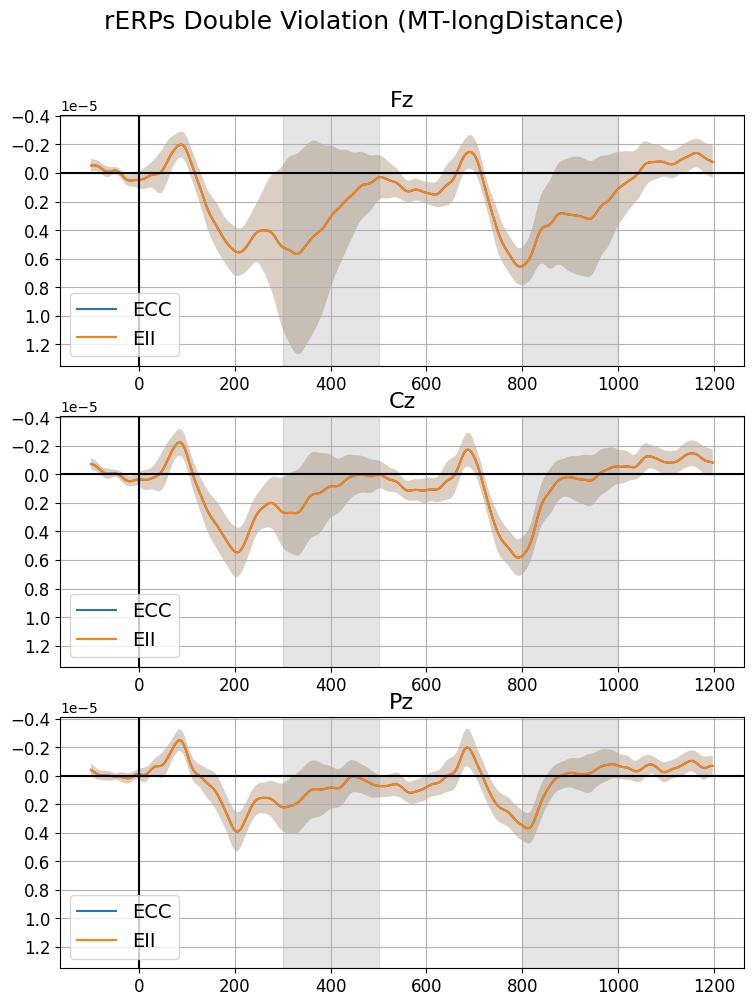

In [4]:
models = rerps.models.regress(obs_data_dub, ["Subject", "Time"], [])
est_data_dub = rerps.models.estimate(obs_data_dub, models)

est_data_summary = rerps.models.DataSummary(est_data_dub, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array, 
        "Condition", title="rERPs Double Violation (MT-longDistance)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_mt_long_dubViol_interc.pdf", bbox_inches='tight')

## Residuals

[dv_splits()]: Sorting set ... ( 0x7f0b186e4a00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 24.62 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0a36f31040 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 23.81 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0b18b30eb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 22.5 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.97 seconds.
[dv_splits()]: Sorting set ... ( 0x7f0a2e44ed60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


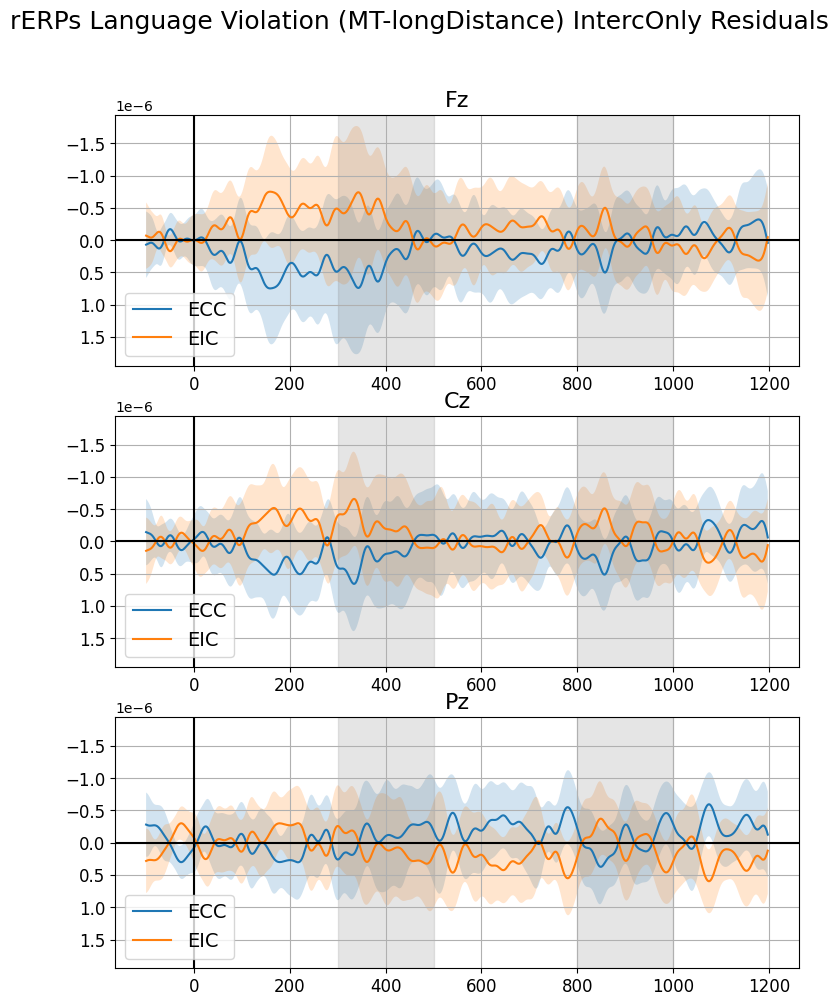

In [5]:
res_data = rerps.models.residuals(obs_data_lan, est_data_lan)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Language Violation (MT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_mt_long_langViol_intercRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f620aeee970 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 28.97 seconds.
[dv_splits()]: Sorting set ... ( 0x7f620b331fa0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 25.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7f620b3318b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 23.12 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.55 seconds.
[dv_splits()]: Sorting set ... ( 0x7f612cc37e50 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.13 seconds.


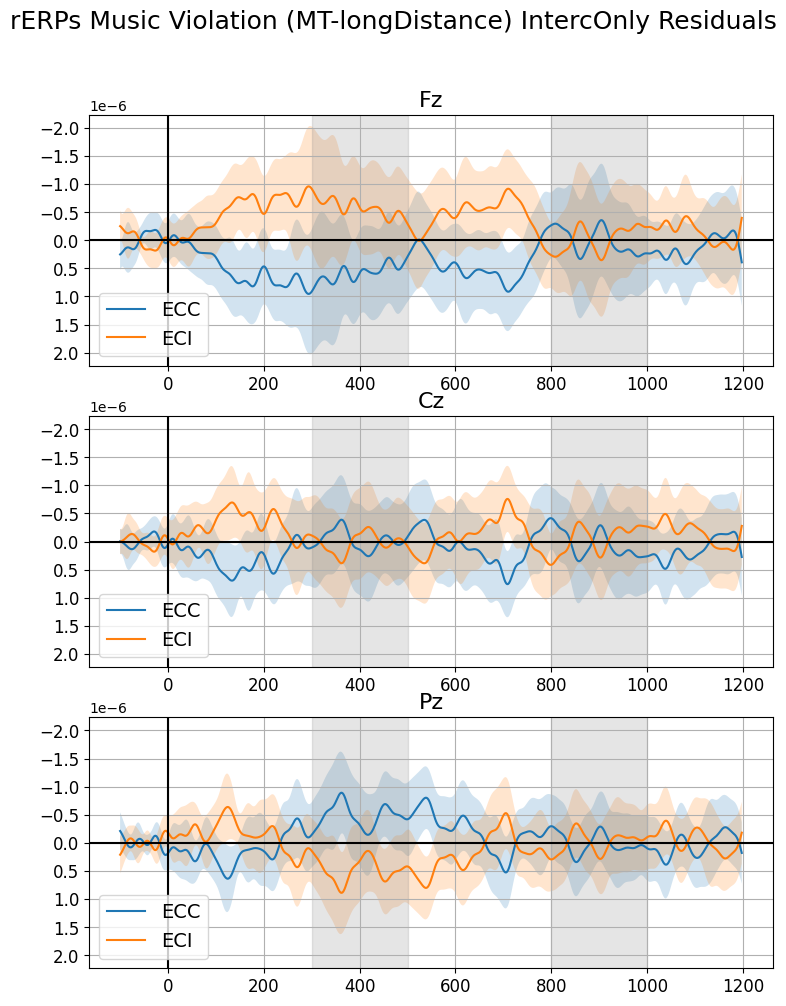

In [5]:
res_data = rerps.models.residuals(obs_data_mus, est_data_mus)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Music Violation (MT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_mt_long_musicViol_intercRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7fdb582667c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 22.19 seconds.
[dv_splits()]: Sorting set ... ( 0x7fda82a0e1c0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 20.93 seconds.
[dv_splits()]: Sorting set ... ( 0x7fdb5869a6a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 19.87 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 5.0 seconds.
[dv_splits()]: Sorting set ... ( 0x7fda79ebfd30 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


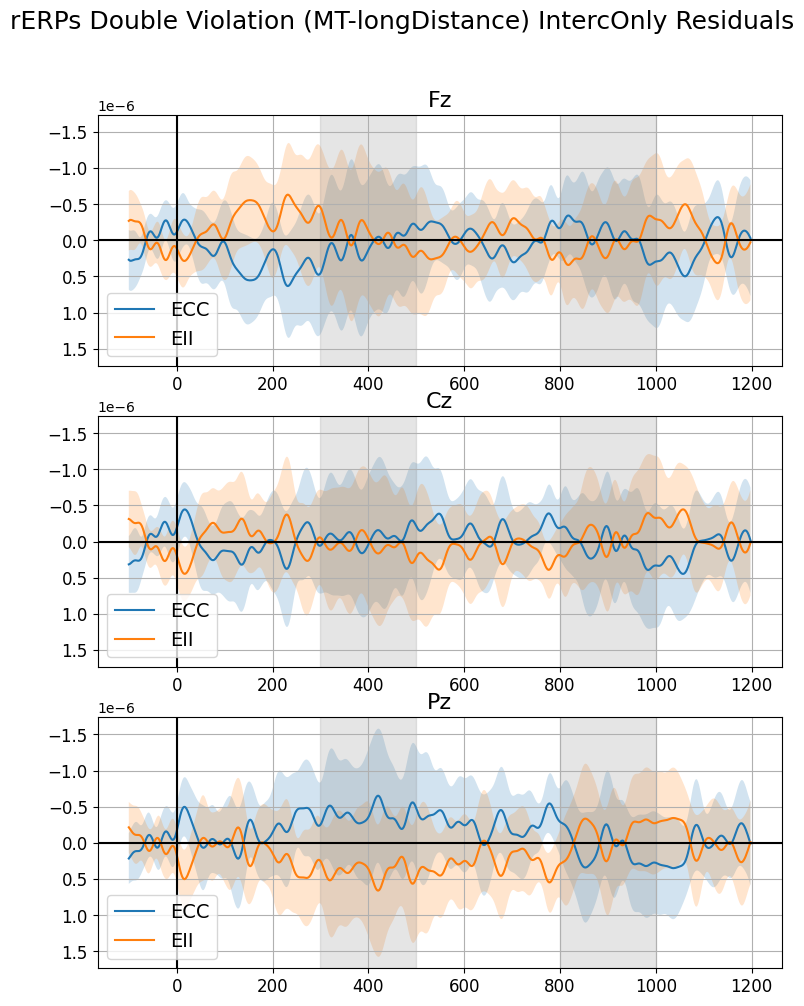

In [5]:
res_data = rerps.models.residuals(obs_data_dub, est_data_dub)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="rERPs Double Violation (MT-longDistance) IntercOnly Residuals", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("figures/rerp_mt_long_dubViol_intercRes.pdf", bbox_inches='tight')

# Modelling

## Language Violation only

[dv_splits()]: Sorting set ... ( 0x7f9fbc1104f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.88 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.34 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc1104f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.82 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f61920520 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.78 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc0df190 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.19 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f6024fbb0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 second

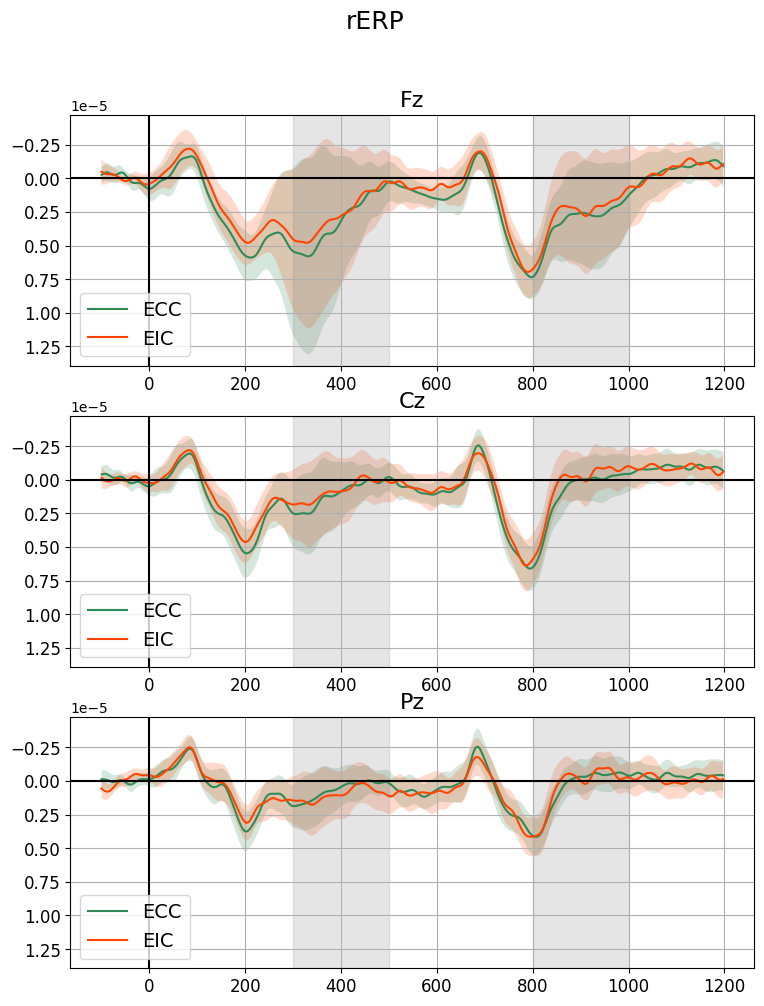

In [65]:
reg_model = rerps.models.regress(obs_data_ld_lan, ["Subject", "Time"], ["LanguageViolation"])
est_data_lan_langViol = rerps.models.estimate(obs_data_ld_lan, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_lan_langViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f9fbc1104f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.45 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc0df190 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.07 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea6717250 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.23 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.58 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa34b3f10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


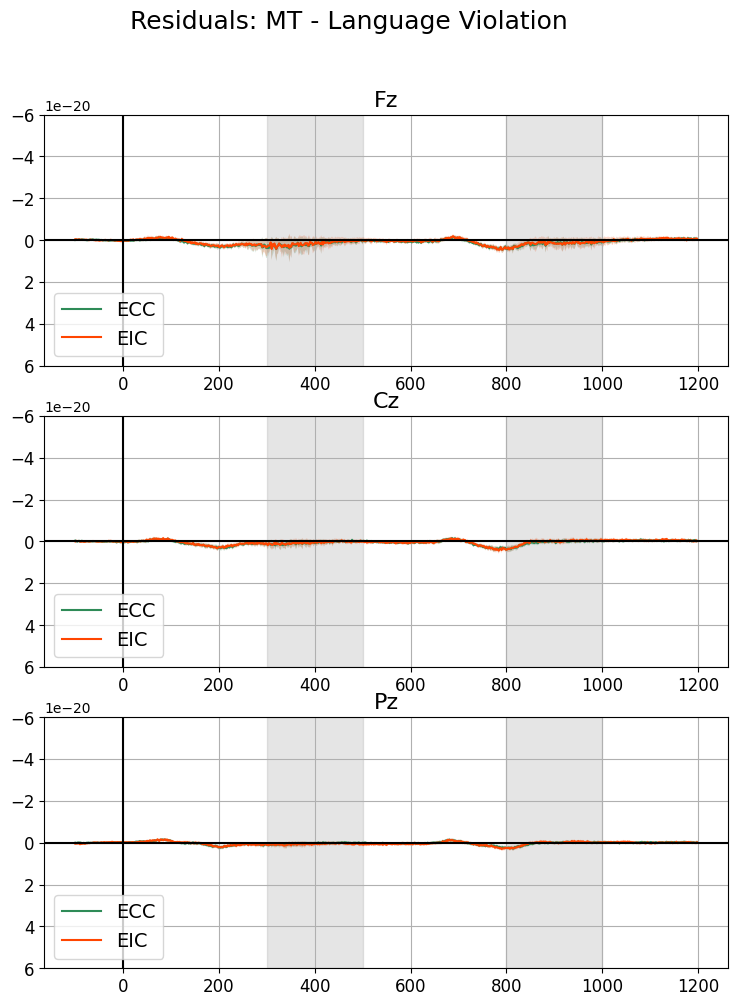

In [66]:
res_data = rerps.models.residuals(obs_data_ld_lan, est_data_lan_langViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,"Condition",
                                         title="Residuals: MT - Language Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)

fig.savefig("finalPlots/residuals_mt_langViol.pdf", bbox_inches='tight')

## Music Violation only

[dv_splits()]: Sorting set ... ( 0x7f9fbc0cb3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.87 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.42 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc0cb3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.81 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ec9106fd0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.91 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f134b5e80 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.24 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f605e0130 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 second

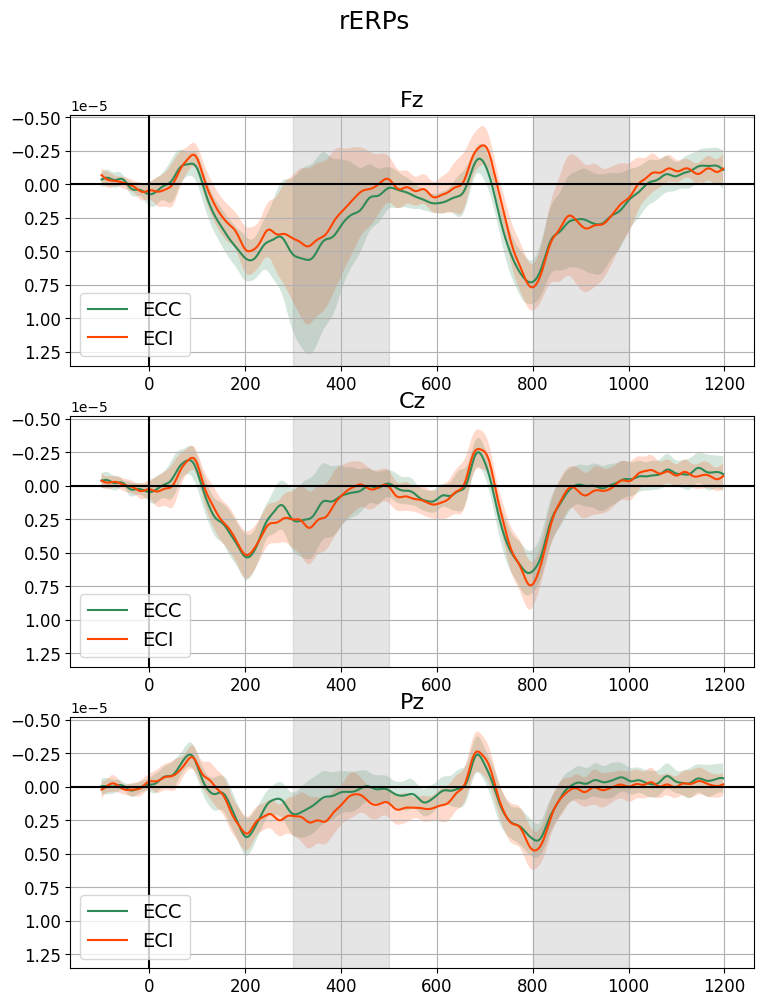

In [67]:
reg_model = rerps.models.regress(obs_data_ld_mus, ["Subject", "Time"], ["MelodyRating"])
est_data_mus_musicViol = rerps.models.estimate(obs_data_ld_mus, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_mus_musicViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["seagreen", "orangered"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7f9fbc0cb3a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.45 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f134b5e80 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.15 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f0b4348e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.22 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.79 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ed31a2d60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


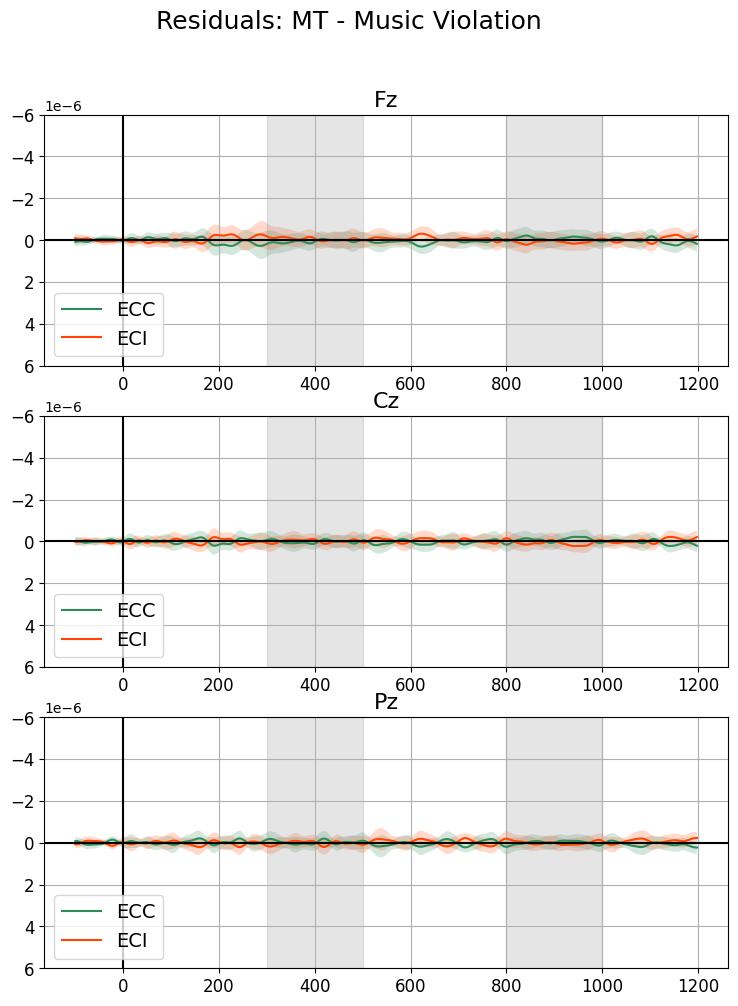

In [68]:
res_data = rerps.models.residuals(obs_data_ld_mus, est_data_mus_musicViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-6
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,"Condition",
                                         title="Residuals: MT - Music Violation",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)
fig.savefig("c", bbox_inches='tight')

## Double Violation

[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.84 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.27 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.83 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc021a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.77 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f13b095e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.28 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.5 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c1dcc10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds

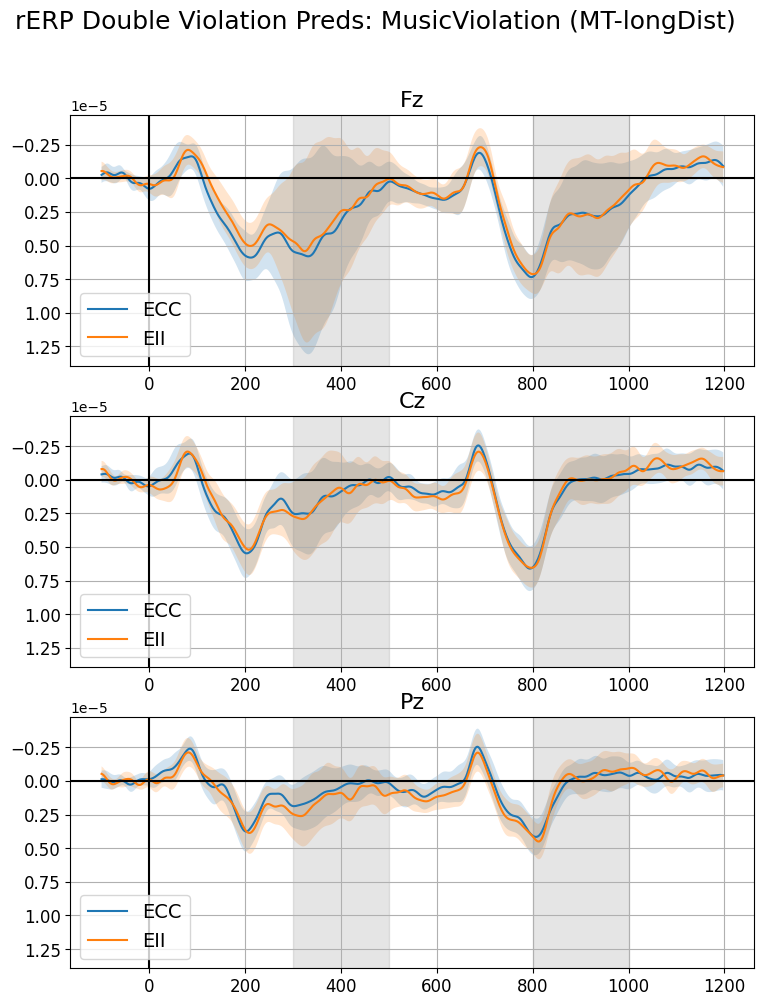

In [30]:
reg_model = rerps.models.regress(obs_data_ld_dub, ["Subject", "Time"], ["MusicViolation"])
est_data_dub_musicViol = rerps.models.estimate(obs_data_ld_dub, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_dub_musicViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP Double Violation Preds: MusicViolation (MT-longDist)", colors=colors, hlt_tws=[(300,500), (800,1000)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.42 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f13b095e0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.13 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f13af0670 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.28 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.46 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa34679a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


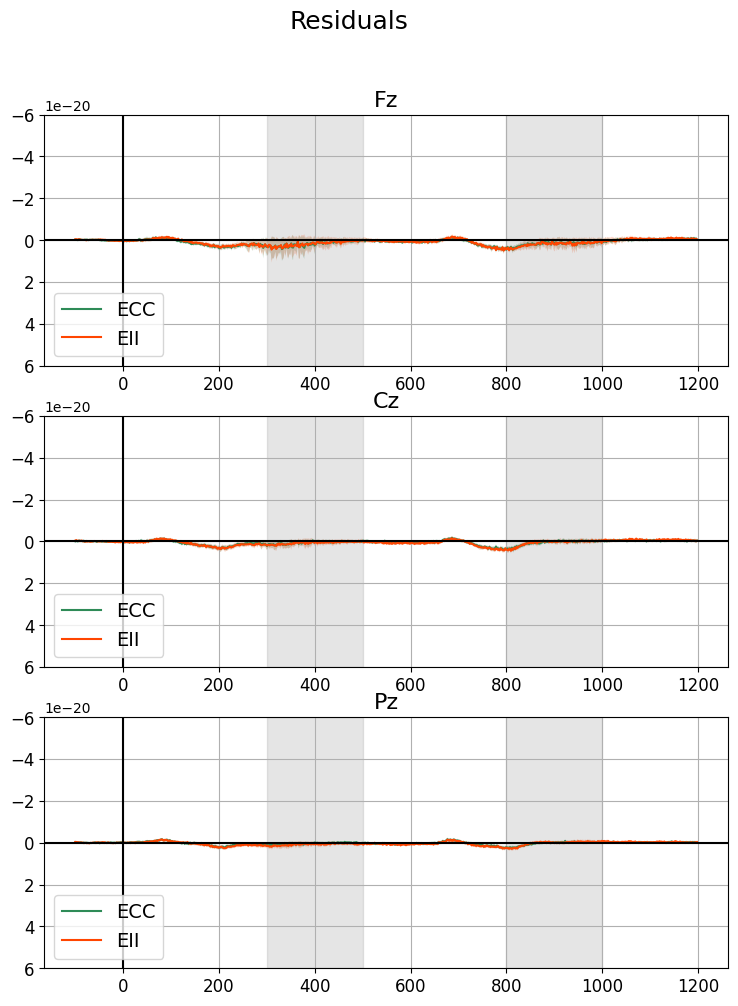

In [31]:
res_data = rerps.models.residuals(obs_data_ld_dub, est_data_dub_musicViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,"Condition",
                                         title="Residuals",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])

fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_mt_long_dubViol_musicViolRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.89 seconds.
[regress()]: Fitting 53946 models ...
[regress()]: Completed in 5.26 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.81 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c2bdd30 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 0.77 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c102700 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.24 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.5 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c119d00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds

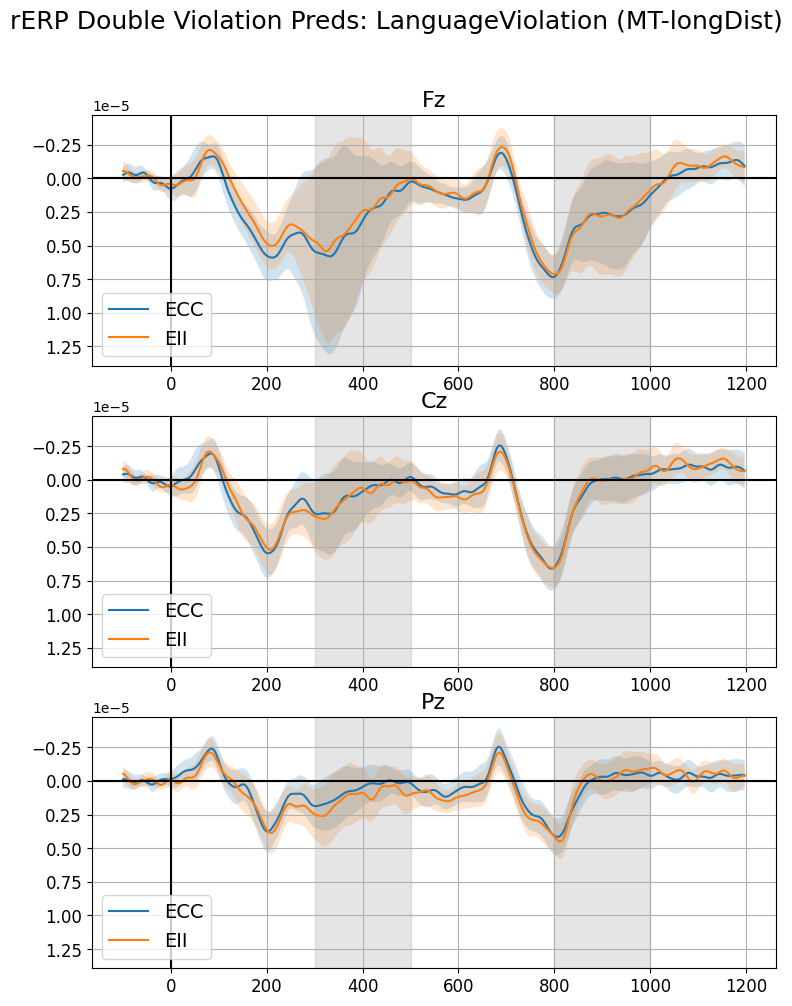

In [27]:
reg_model = rerps.models.regress(obs_data_ld_dub, ["Subject", "Time"], ["LanguageViolation"])
est_data_dub_langViol = rerps.models.estimate(obs_data_ld_dub, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_dub_langViol, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERP Double Violation Preds: LanguageViolation (MT-longDist)", colors=colors, hlt_tws=[(300,500), (800,1000)])

fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7f9fbc031310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.44 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c102700 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 3.25 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c04da30 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.28 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 4.49 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f61dc19a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.02 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.11 seconds.


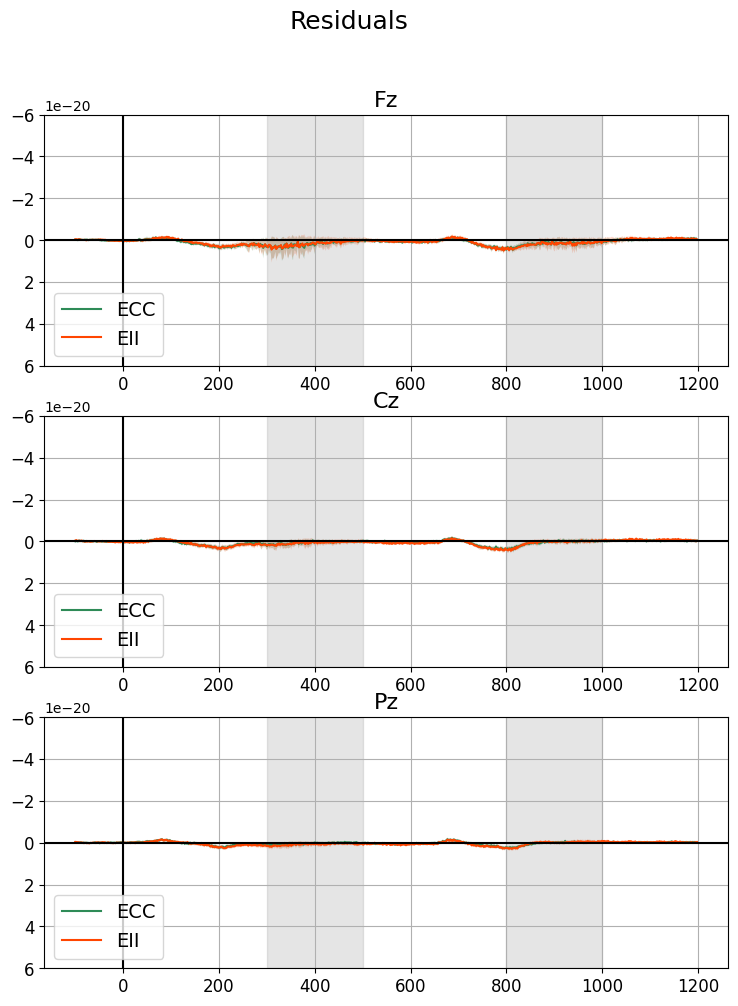

In [29]:
res_data = rerps.models.residuals(obs_data_ld_dub, est_data_dub_langViol)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["seagreen", "orangered"]
factor = 1e-20
new_ymin = 6 * factor
new_ymax = -6 * factor

fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,"Condition",
                                         title="Residuals",
                                         colors=colors, ymin=new_ymin, ymax=new_ymax, hlt_tws=[(300,500), (800,1000)])

fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_mt_long_dubViol_langViolRes.pdf", bbox_inches='tight')

# Estimating all conditions

In [70]:
# Create DataSet object including all conditions in MT
obs_data = rerps.models.DataSet(
    data    = df,  
    descriptors = ["Subject", "Time", "Condition"],
    electrodes  = ['Fz','Cz','Pz'],
    predictors  = ['MelodyRating', 'LanguageViolation','MusicViolation'])

obs_data.array[:,obs_data.descriptors["Time"]] = obs_data.array[:,obs_data.descriptors["Time"]] * 1000
# obs_data.array = obs_data.array[(obs_data.array[:,obs_data.descriptors["cond"]] >= 125) & (obs_data.array[:,obs_data.descriptors["cond"]] <= 128) ,:]

# z-standardization
obs_data.zscore_predictor("MelodyRating")
# obs_data.zscore_predictor("meanSentRating")


# inversion (more means better 'sounding')
obs_data.array[:,obs_data.predictors["MelodyRating"]] *= -1
# obs_data.array[:,obs_data.predictors["meanSentRating"]] *= -1

# Array of electrodes
array = [["Fz+"],
         ["Cz+"],
         ["Pz+",]]

[DataSet.__init__()]: Reading data ...
[DataSet.__init__()]: Completed in 0.88 seconds.


[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.56 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.93 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa1935640 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


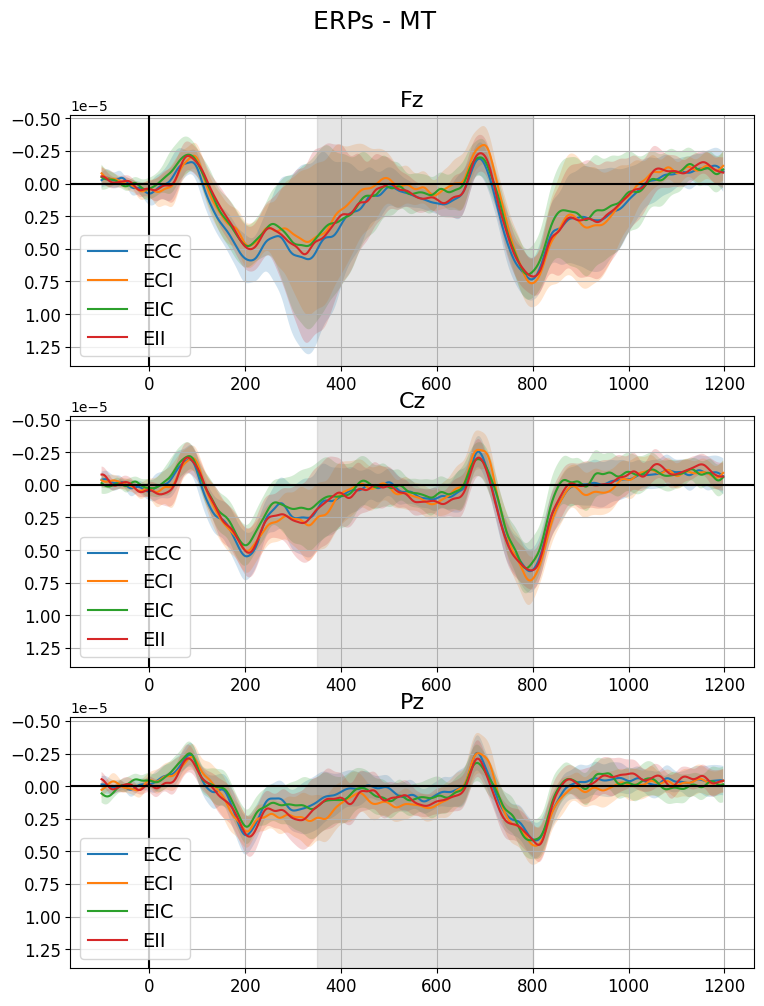

In [69]:
# Calculate ERPs
obs_data_summary = rerps.models.DataSummary(obs_data, ["Condition", "Subject", "Time"])
obs_data_summary = rerps.models.DataSummary(obs_data_summary, ["Condition", "Time"])

# Plot ERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(obs_data_summary, "Time", array,
        "Condition", title="ERPs - MT", colors=colors, hlt_tws=[(350, 800)])

legend_fontsize = 10
fig.set_size_inches(30,15)
fig.savefig( 'finalPlots/erps_mt.pdf', bbox_inches='tight' )

[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.21 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.35 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.72 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa3496310 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 1.7 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f61c470a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.59 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.34 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f0b3eaac0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


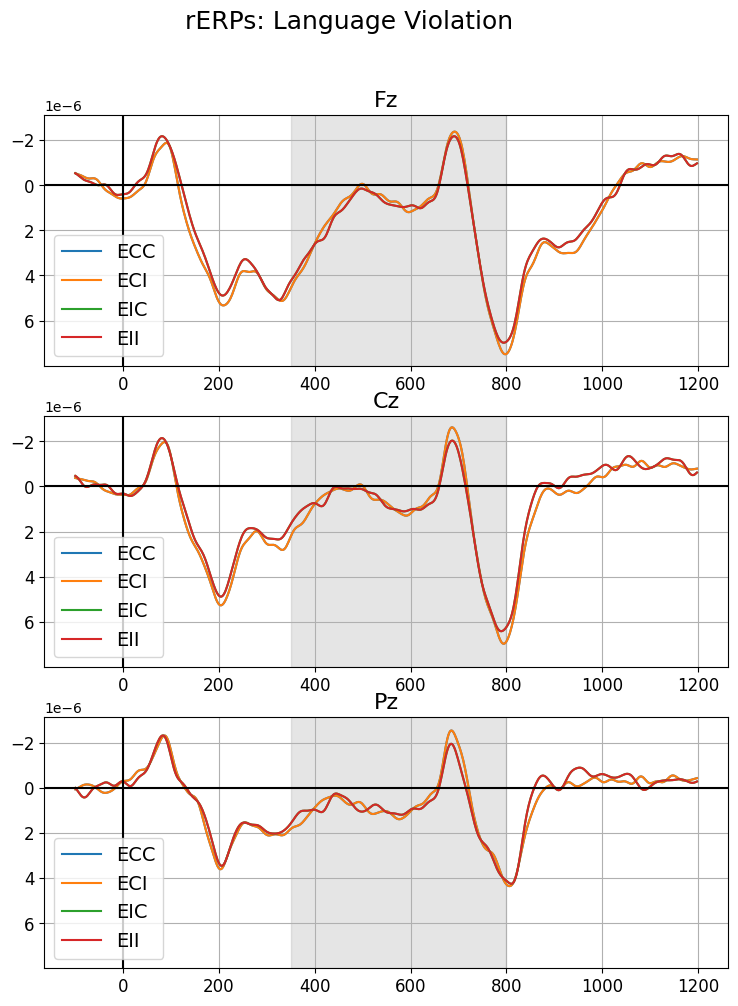

In [52]:
# LANGUAGE only
reg_model = rerps.models.regress(obs_data, ["Time"], ["LanguageViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs: Language Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 7.93 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f61c470a0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.71 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea6792f70 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.17 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.36 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f5c190250 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


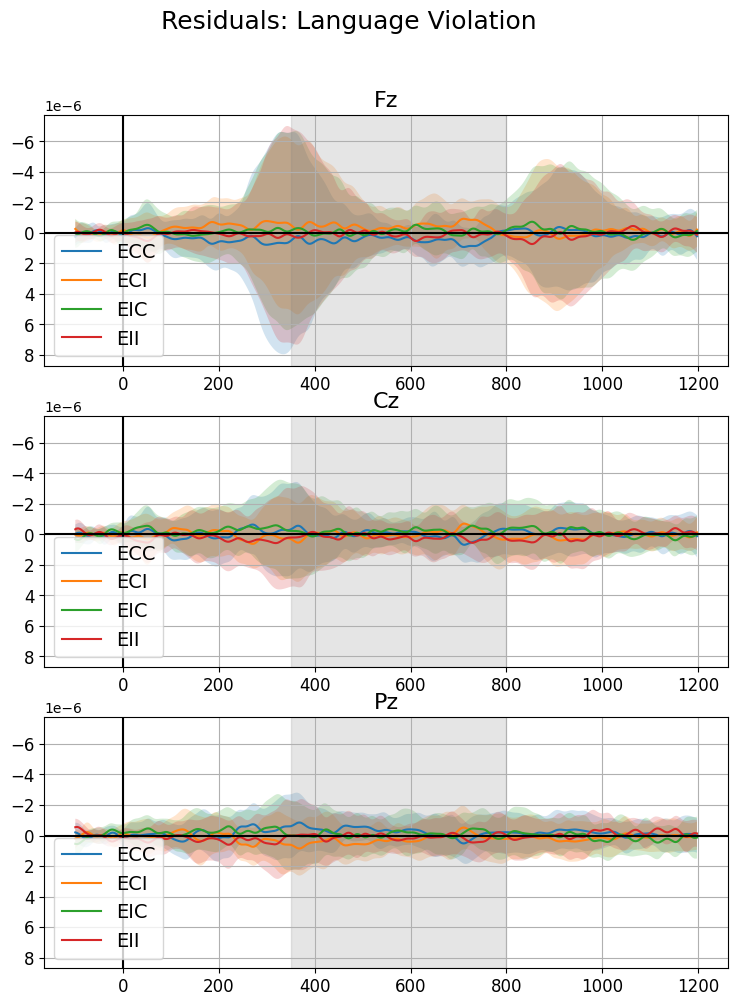

In [53]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Language Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_mt_long_fullModelRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.93 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.56 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 2.15 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea6794550 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 2.15 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f620bed00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.6 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.65 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f620beaf0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.21 seconds.


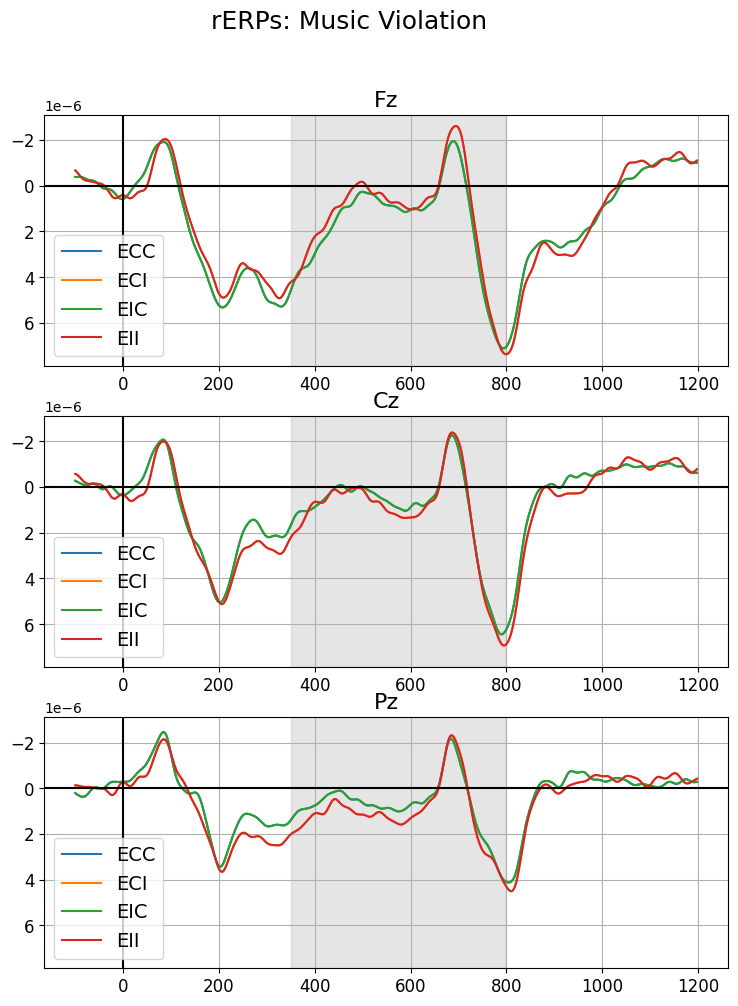

In [54]:
# MUSIC only
reg_model = rerps.models.regress(obs_data, ["Time"], ["MusicViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs: Music Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f9fa3511a60 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 9.09 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f620bed00 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 7.9 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa7133ac0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.39 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.9 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea676e1f0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.21 seconds.


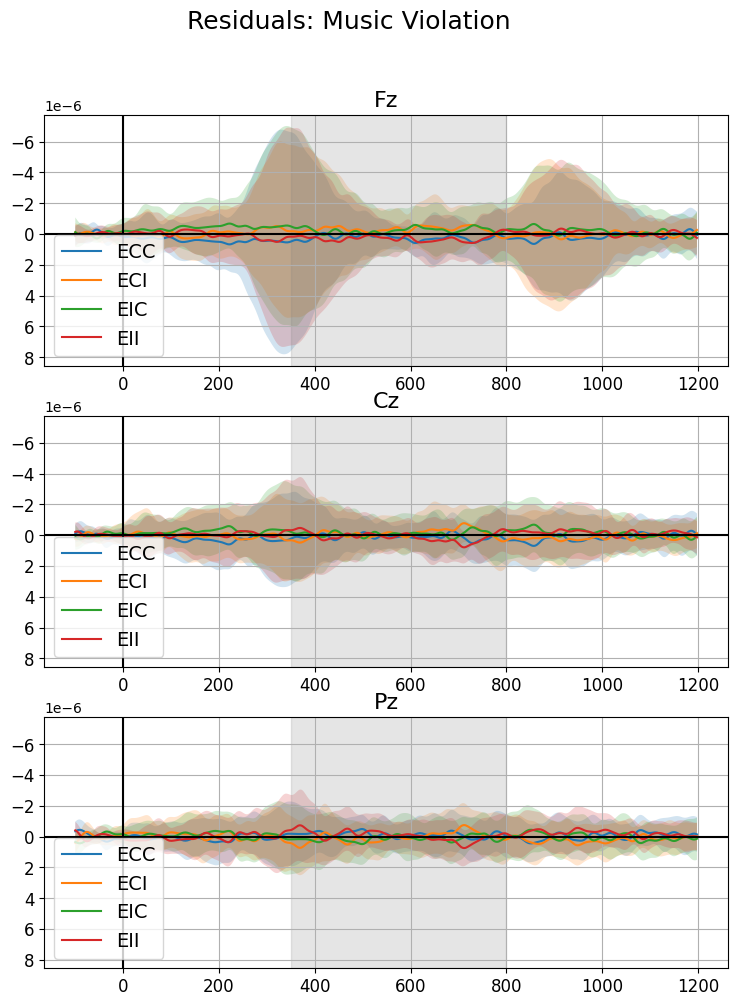

In [55]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Music Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)

# fig.savefig("figures/rerp_mt_long_fullModelRes.pdf", bbox_inches='tight')

[dv_splits()]: Sorting set ... ( 0x7f9ea673a730 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.55 seconds.
[regress()]: Fitting 1998 models ...
[regress()]: Completed in 1.48 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea673a730 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 1.64 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea6770160 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[estimate()]: Estimating data ...
[estimate()]: Completed in 2.91 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea67705b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 4.96 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 10.33 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f62018c10 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.25 seconds

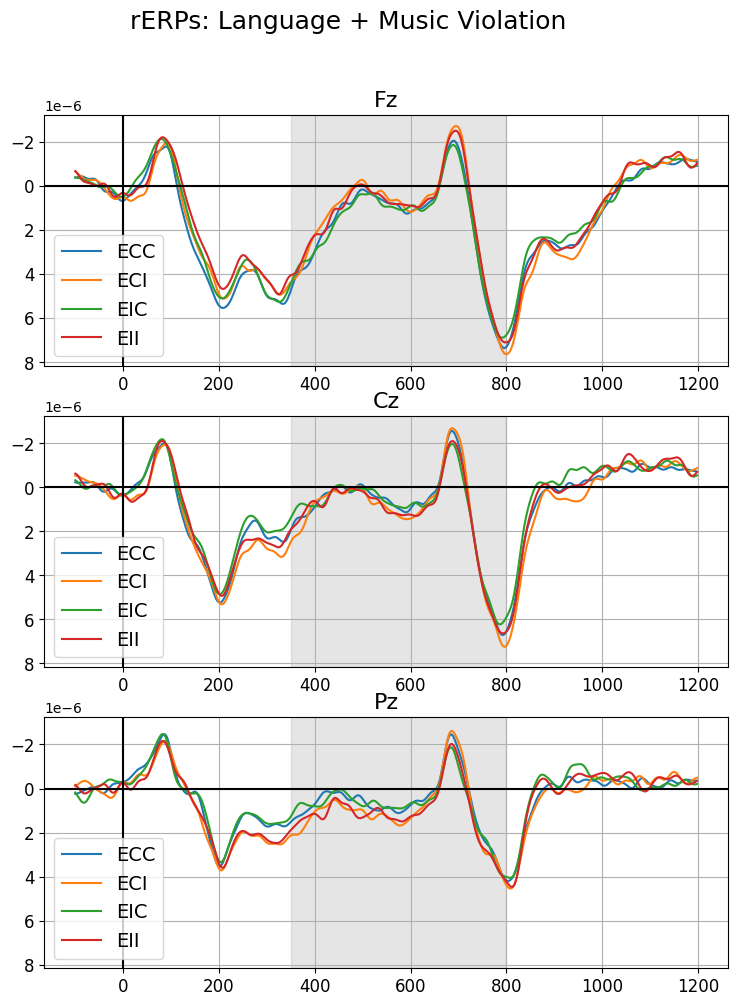

In [71]:
# LANGUAGE + MUSIC 
reg_model = rerps.models.regress(obs_data, ["Time"], ["MusicViolation", "LanguageViolation"])
est_data_all = rerps.models.estimate(obs_data, reg_model)
est_data_summary = rerps.models.DataSummary(est_data_all, ["Condition", "Subject", "Time"])
est_data_summary = rerps.models.DataSummary(est_data_summary, ["Condition", "Time"])

# Plotting rERPs
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(est_data_summary, "Time", array,
            "Condition", title="rERPs: Language + Music Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)


[dv_splits()]: Sorting set ... ( 0x7f9ea673a730 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 8.31 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9ea67705b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 6.69 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9f0b38c700 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 5.09 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 9.49 seconds.
[dv_splits()]: Sorting set ... ( 0x7f9fa19592b0 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.05 seconds.
[DataSummary.__init__()]: Summarizing data ...
[DataSummary.__init__()]: Completed in 0.22 seconds.


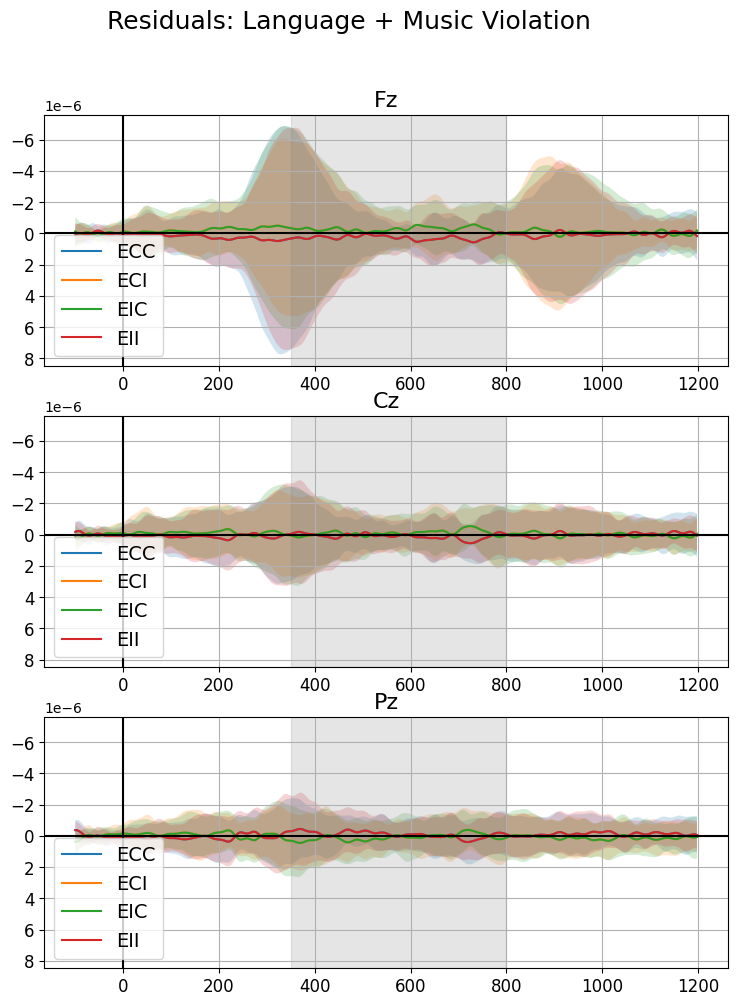

In [72]:
res_data = rerps.models.residuals(obs_data, est_data_all)
res_data_summary = rerps.models.DataSummary(res_data, ["Condition", "Subject", "Time"])
res_data_summary = rerps.models.DataSummary(res_data_summary, ["Condition", "Time"])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_voltages_grid(res_data_summary, "Time", array,
        "Condition", title="Residuals: Language + Music Violation", colors=colors, hlt_tws=[(350, 800)])
fig.set_size_inches(30, 15)


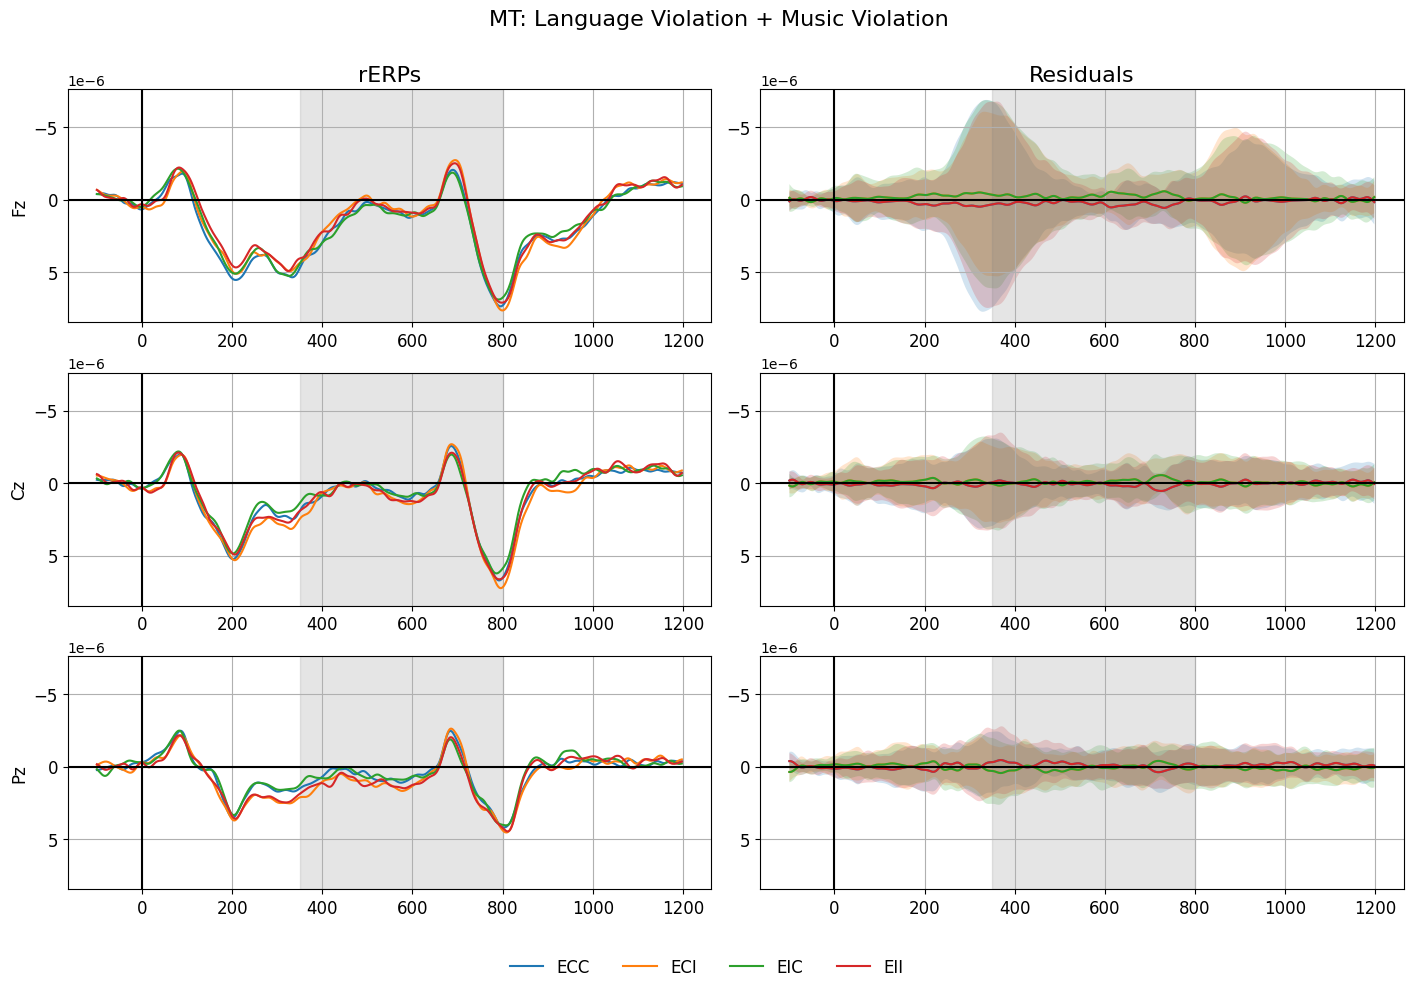

In [74]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 10), sharey=True, sharex=True)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Fz', groupby="Condition",
                          title="rERPs", legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax1)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Cz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax3)

rerps.plots.plot_voltages(est_data_summary, "Time", 'Pz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax5)


rerps.plots.plot_voltages(res_data_summary, "Time", 'Fz', groupby="Condition",
                          title="Residuals", legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax2)

rerps.plots.plot_voltages(res_data_summary, "Time", 'Cz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax4)

rerps.plots.plot_voltages(res_data_summary, "Time", 'Pz', groupby="Condition",
                          title=None, legend=None, colors=colors, hlt_tws=[(350, 800)], ax=ax6)


for ax in [ax1, ax3, ax5]:
    ax.invert_yaxis()

# Adjust spacing between subplots
plt.tight_layout()

ax1.set_ylabel( 'Fz', fontsize='large' )
ax3.set_ylabel( 'Cz', fontsize='large' )
ax5.set_ylabel( 'Pz', fontsize='large' )

fig.suptitle('MT: Language Violation + Music Violation', fontsize=16)
plt.subplots_adjust(top=0.90)

handles, labels = ax1.get_legend_handles_labels()

# Create a legend at the bottom of the figure
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize='large', frameon=False)

# Adjust the layout again to make room for the legend
plt.subplots_adjust(bottom=0.10)

fig.savefig( 'finalPlots/rerps_residuals_mt.pdf', bbox_inches='tight' )

[dv_splits()]: Sorting set ... ( 0x7f9ea6770160 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[ModelSummary.__init__()]: Summarizing models ...
[ModelSummary.__init__()]: Completed in 0.03 seconds.


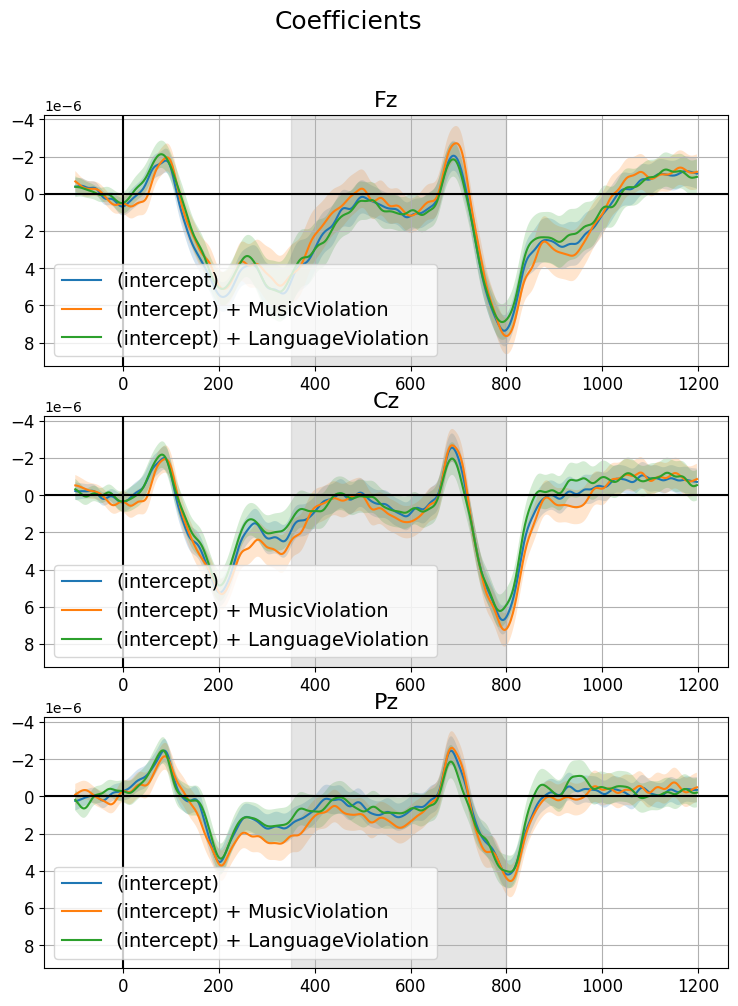

In [75]:
models_summary = rerps.models.ModelSummary(reg_model, ["Time"])
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_coefficients_grid(models_summary, "Time", array, 
                                             anchor=True, title="Coefficients", colors=colors, hlt_tws=[(350, 800)]) 
fig.set_size_inches(30, 15)

[dv_splits()]: Sorting set ... ( 0x7f9ea6770160 )
[dv_splits()]: Identifying splits ...
[dv_splits()]: Completed in 0.0 seconds.
[ModelSummary.__init__()]: Summarizing models ...
[ModelSummary.__init__()]: Completed in 0.03 seconds.


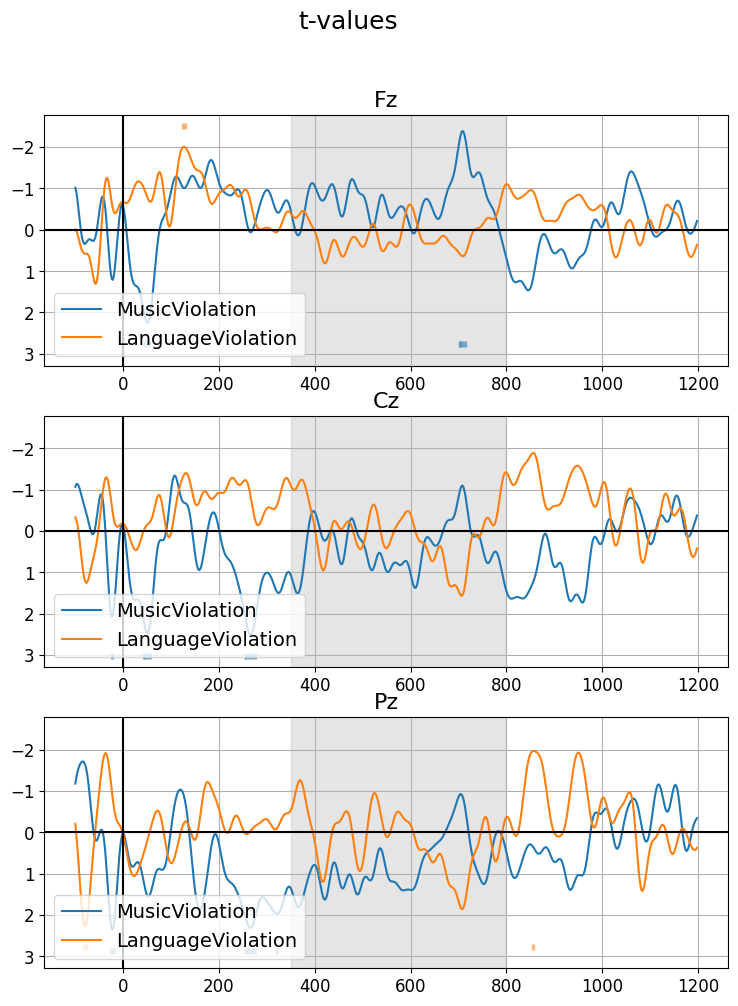

In [76]:
models = rerps.models.pvalue_correction(reg_model, "Time", [(350.7317073170731,801.4634146341464)], est_data_all.electrodes)
models_summary = rerps.models.ModelSummary(reg_model, ["Time"])

colors =  ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fig, ax = rerps.plots.plot_tvalues_grid(models_summary, "Time", array, intercept=False,
            pvalues=True, alpha=0.05, title="t-values", colors=colors, hlt_tws=[(350, 800)])

fig.set_size_inches(30, 15)

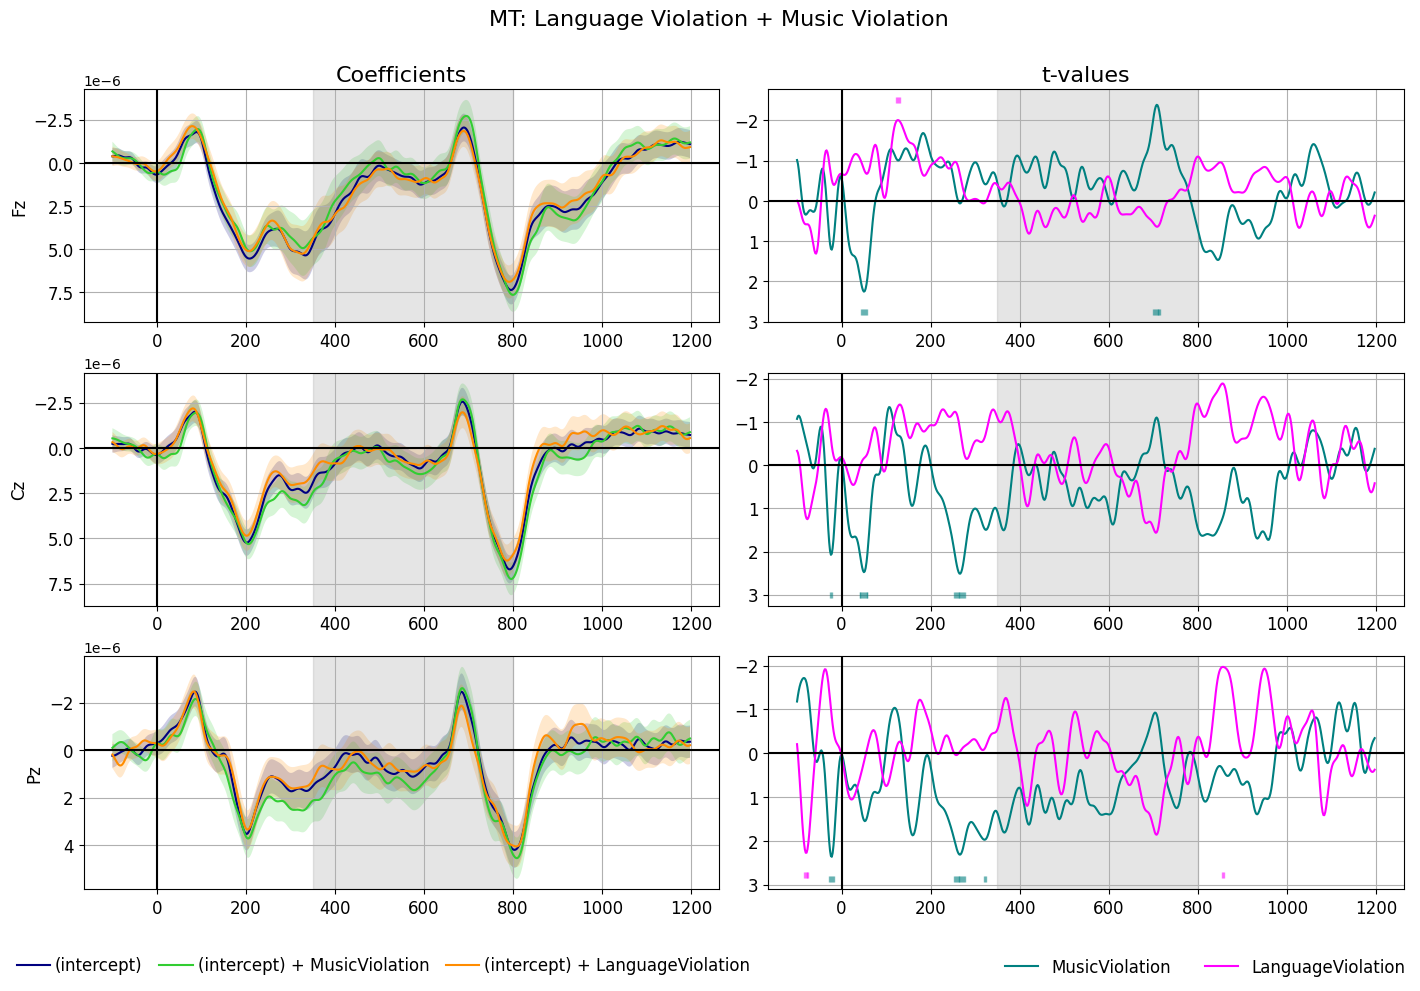

In [79]:
# colors1 = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
colors1 = ["navy", "limegreen", "darkorange"]
colors2 = ['teal','magenta']

# Create a figure with subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

rerps.plots.plot_coefficients(models_summary, "Time", 'Fz',
                          title="Coefficients", legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax1)

rerps.plots.plot_coefficients(models_summary, "Time", 'Cz',
                          title=None, legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax3)

rerps.plots.plot_coefficients(models_summary, "Time", 'Pz',
                          title=None, legend=None, colors=colors1, hlt_tws=[(350, 800)], ax=ax5)


rerps.plots.plot_tvalues(models_summary, "Time", 'Fz',
                          title="t-values", legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax2)

rerps.plots.plot_tvalues(models_summary, "Time", 'Cz',
                          title=None, legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax4)

rerps.plots.plot_tvalues(models_summary, "Time", 'Pz',
                          title=None, legend=None, colors=colors2, hlt_tws=[(350, 800)], ax=ax6)


for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.invert_yaxis()

# Adjust spacing between subplots
plt.tight_layout()

ax1.set_ylabel( 'Fz', fontsize='large' )
ax3.set_ylabel( 'Cz', fontsize='large' )
ax5.set_ylabel( 'Pz', fontsize='large' )

# Add title
fig.suptitle('MT: Language Violation + Music Violation', fontsize=16)
plt.subplots_adjust(top=0.90)

handles, labels = ax1.get_legend_handles_labels()

# Collect handles and labels for legends
handles_left, labels_left = ax1.get_legend_handles_labels()
handles_right, labels_right = ax2.get_legend_handles_labels()

# Create legends
fig.legend(handles_left, labels_left, loc='lower left', ncol=4, fontsize='large', frameon=False, handletextpad=0.3, columnspacing=1.0, borderpad=0.5)
fig.legend(handles_right, labels_right, loc='lower right', ncol=4, fontsize='large', frameon=False)


# Adjust the layout
plt.subplots_adjust(bottom=0.10)

fig.savefig( 'finalPlots/coefs_tvals_mt.pdf', bbox_inches='tight' )